# Análisis de Datos Exploratorio (EDA)

## Importación de librerias

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings('ignore')

from collections import Counter # Para contar frecuencias

## Importar datasets

In [42]:
df_cast = pd.read_parquet("https://github.com/alejocampos1/Henry_PI1_Alejandro-Campos/raw/main/Datasets/Datasets_Limpios/Parquet/cast.parquet")
df_crew = pd.read_parquet("https://github.com/alejocampos1/Henry_PI1_Alejandro-Campos/raw/main/Datasets/Datasets_Limpios/Parquet/crew.parquet")
df_genres = pd.read_parquet("https://github.com/alejocampos1/Henry_PI1_Alejandro-Campos/raw/main/Datasets/Datasets_Limpios/Parquet/genres.parquet")
df_movies = pd.read_parquet("https://github.com/alejocampos1/Henry_PI1_Alejandro-Campos/raw/main/Datasets/Datasets_Limpios/Parquet/movies.parquet")
df_prodcompanies = pd.read_parquet("https://github.com/alejocampos1/Henry_PI1_Alejandro-Campos/raw/main/Datasets/Datasets_Limpios/Parquet/prodcompanies.parquet")
df_prodcountries = pd.read_parquet("https://github.com/alejocampos1/Henry_PI1_Alejandro-Campos/raw/main/Datasets/Datasets_Limpios/Parquet/prodcountries.parquet")

## Análisis Exploratorio
Para un sistema de recomendación, es importante comprender la diversidad de las películas en términos de géneros, idiomas, popularidad, etc.

## Dataframe 'df_movies'
#### Información relevante del dataset

In [43]:
df_movies.head(5)

,id,title,genres,overview,tagline,runtime,release_date,production_companies,belongs_to_collection,original_language,spoken_languages,budget,revenue,status,production_countries,popularity,vote_average,vote_count,release_year,return
0,862,Toy Story,"[16, 35, 10751]","Led by Woody, Andy's toys live happily in his ...",None,81.0,1995-10-30,[3],10194,en,[en],30000000.0,373554033.0,Released,[US],21.946943,7.7,5415.0,1995,12.451801
1,8844,Jumanji,"[12, 14, 10751]",When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!,104.0,1995-12-15,"[559, 2550, 10201]",<NA>,en,"[en, fr]",65000000.0,262797249.0,Released,[US],17.015539,6.9,2413.0,1995,4.043035
2,15602,Grumpier Old Men,"[10749, 35]",A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...,101.0,1995-12-22,"[6194, 19464]",119050,en,[en],0.0,0.0,Released,[US],11.712900,6.5,92.0,1995,0.000000
3,31357,Waiting to Exhale,"[35, 18, 10749]","Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...,127.0,1995-12-22,[306],<NA>,en,[en],16000000.0,81452156.0,Released,[US],3.859495,6.1,34.0,1995,5.090760
4,11862,Father of the Bride Part II,[35],Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...,106.0,1995-02-10,"[5842, 9195]",96871,en,[en],0.0,76578911.0,Released,[US],8.387519,5.7,173.0,1995,0.000000


In [44]:
df_movies.shape

(45376, 20)

In [45]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     45376 non-null  int64         
 1   title                  45376 non-null  object        
 2   genres                 45376 non-null  object        
 3   overview               44435 non-null  object        
 4   tagline                20398 non-null  object        
 5   runtime                45130 non-null  float64       
 6   release_date           45376 non-null  datetime64[ns]
 7   production_companies   45376 non-null  object        
 8   belongs_to_collection  4480 non-null   Int64         
 9   original_language      45365 non-null  object        
 10  spoken_languages       45376 non-null  object        
 11  budget                 45376 non-null  float64       
 12  revenue                45376 non-null  float64       
 13  status

#### Revisión de datos faltantes

In [46]:
df_movies.isnull().sum()

id                           0
title                        0
genres                       0
overview                   941
tagline                  24978
runtime                    246
release_date                 0
production_companies         0
belongs_to_collection    40896
original_language           11
spoken_languages             0
budget                       0
revenue                      0
status                      80
production_countries         0
popularity                   0
vote_average                 0
vote_count                   0
release_year                 0
return                       0
dtype: int64

In [47]:
# Columnas que contiene
df_movies.columns

Index(['id', 'title', 'genres', 'overview', 'tagline', 'runtime',
       'release_date', 'production_companies', 'belongs_to_collection',
       'original_language', 'spoken_languages', 'budget', 'revenue', 'status',
       'production_countries', 'popularity', 'vote_average', 'vote_count',
       'release_year', 'return'],
      dtype='object')

Para continuar con el análisis se eliminarán las columnas que se considera que no aportan valor real

In [48]:
# Eliminar columnas que no se considerarán
columnas_eliminar = ['tagline', 'release_date', 'status', 'return', 'belongs_to_collection', 'vote_count']

df_movies_filtered = df_movies.drop(columns=columnas_eliminar)

df_movies_filtered.head(2)

,id,title,genres,overview,runtime,production_companies,original_language,spoken_languages,budget,revenue,production_countries,popularity,vote_average,release_year
0,862,Toy Story,"[16, 35, 10751]","Led by Woody, Andy's toys live happily in his ...",81.0,[3],en,[en],30000000.0,373554033.0,[US],21.946943,7.7,1995
1,8844,Jumanji,"[12, 14, 10751]",When siblings Judy and Peter discover an encha...,104.0,"[559, 2550, 10201]",en,"[en, fr]",65000000.0,262797249.0,[US],17.015539,6.9,1995


In [49]:
df_movies_filtered.isnull().sum()

id                        0
title                     0
genres                    0
overview                941
runtime                 246
production_companies      0
original_language        11
spoken_languages          0
budget                    0
revenue                   0
production_countries      0
popularity                0
vote_average              0
release_year              0
dtype: int64

### Normalización de columnas referentes a dinero (Budget, Revenue)


In [50]:
df_movies_filtered['budget'] = df_movies_filtered['budget']/1000000
df_movies_filtered['revenue'] = df_movies_filtered['revenue']/1000000

Información del Dataset

In [51]:
df_movies_filtered[['runtime', 'budget', 'revenue', 'popularity', 'vote_average']].describe()

,runtime,budget,revenue,popularity,vote_average
count,45130.000000,45376.000000,45376.000000,45376.000000,45376.000000
mean,94.181675,4.232604,11.230099,2.926458,5.624070
std,38.341059,17.439860,64.389957,6.009672,1.915423
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,85.000000,0.000000,0.000000,0.388840,5.000000
50%,95.000000,0.000000,0.000000,1.130454,6.000000
75%,107.000000,0.000000,0.000000,3.691695,6.800000
max,1256.000000,380.000000,2787.965087,547.488298,10.000000


### Distribución de Géneros
Los géneros juegan un papel importante en las recomendaciones, ya que son características clave para la similitud de las películas.

In [52]:
# Lista vacía para almacenar los géneros
lista_generos = []

# Iterar sobre las listas de géneros dentro de df_movies
for index, row in df_movies.iterrows():
    generos = row['genres']
    lista_generos.extend(generos)

# Contar la frecuencia de géneros
conteo_generos = Counter(lista_generos)

conteo_generos_nombre = {}

# Iterar sobre las claves (item_ids) y valores del diccionario
for item_id, count in conteo_generos.items():
    # Buscar el nombre del género correspondiente al item_id
    genero_nombre = df_genres.loc[df_genres['id'] == item_id, 'name'].values[0]
    
    # Asignar el nuevo nombre del género como clave en el nuevo diccionario
    conteo_generos_nombre[genero_nombre] = count

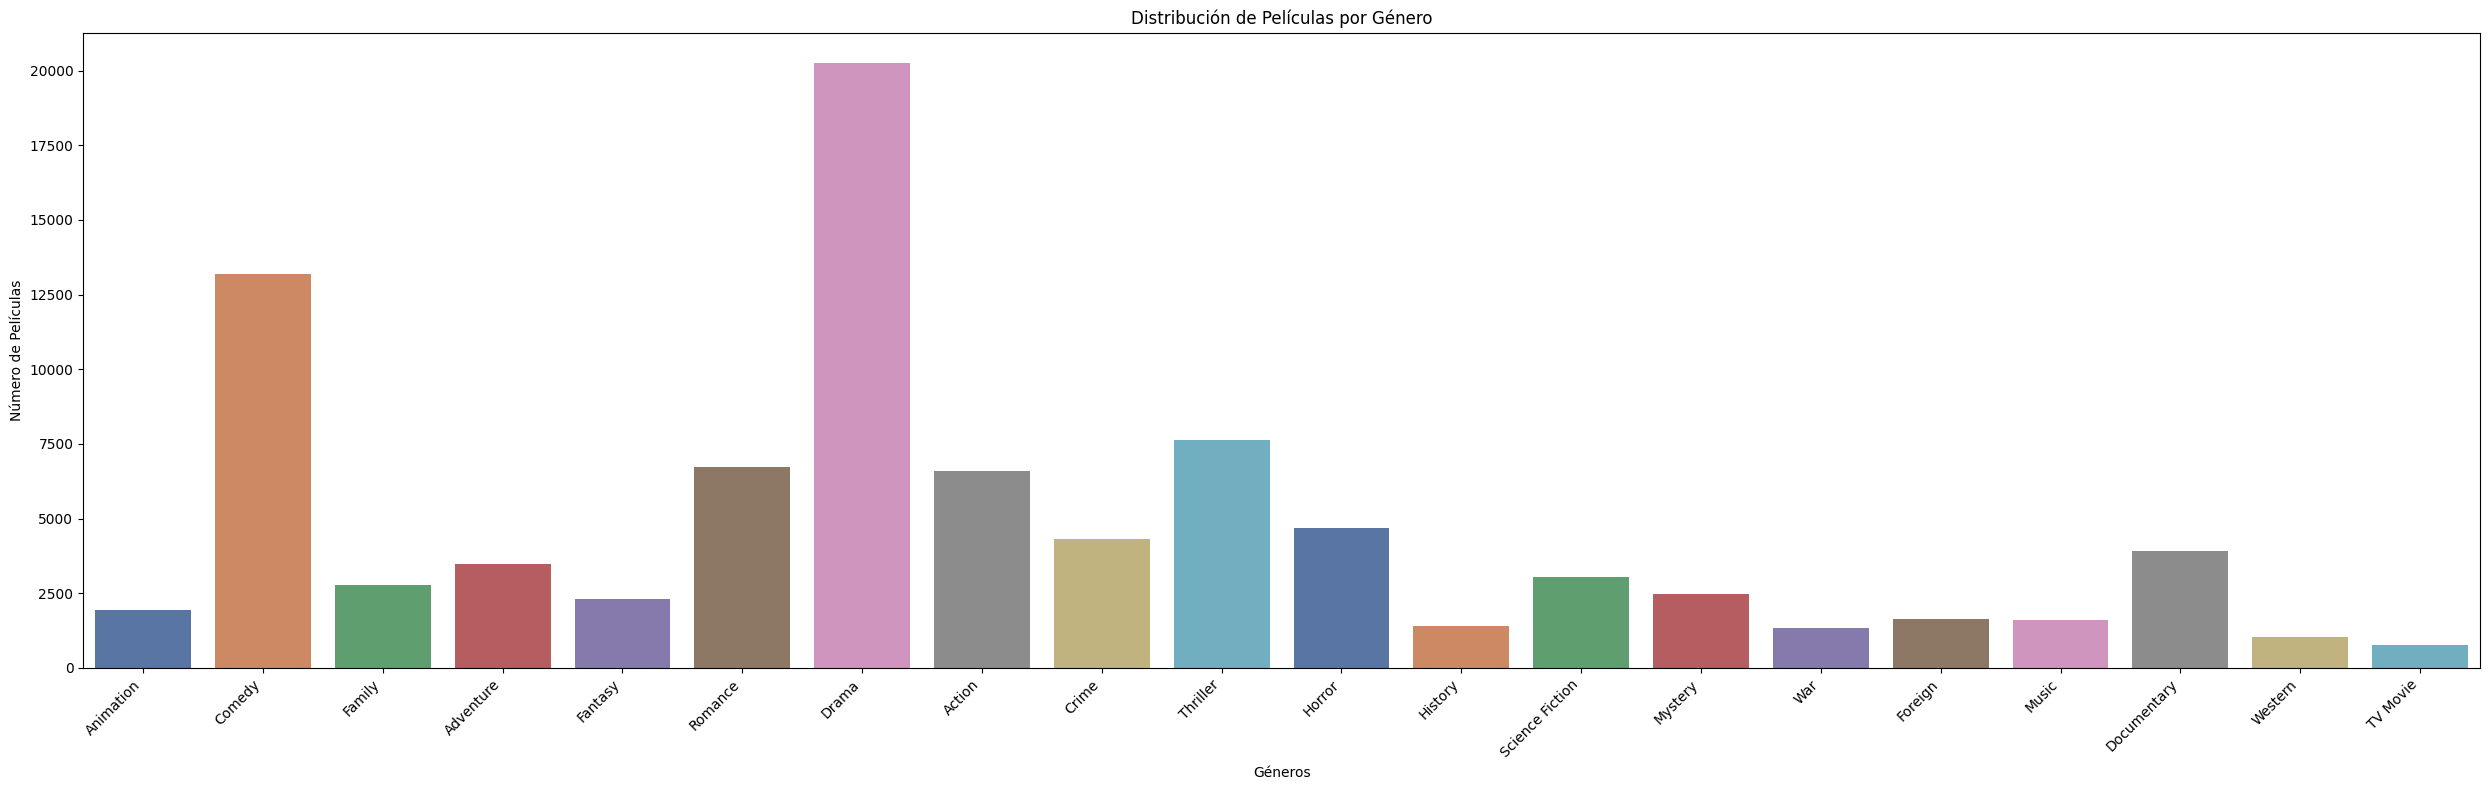

In [53]:
# Crear listas para ploteo
generos = list(conteo_generos_nombre.keys())
conteo = list(conteo_generos_nombre.values())

# Histograma para ver la distribución
plt.figure(figsize=(25, 8))
sns.barplot(x = generos, y = conteo, palette='deep')
plt.title('Distribución de Películas por Género')
plt.xlabel('Géneros')
plt.ylabel('Número de Películas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Distribución de años de lanzamiento
Visualizar cómo se distribuyen las películas a lo largo de los años

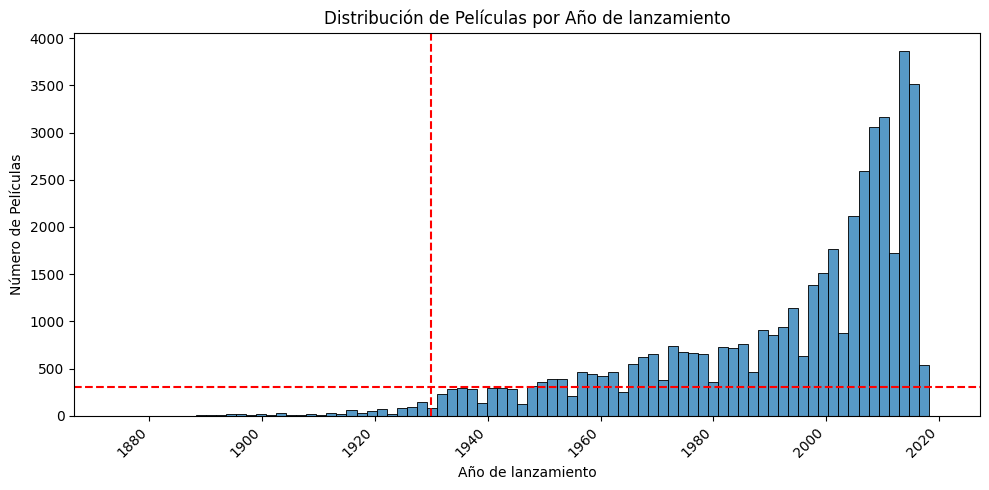

In [54]:
# Histograma para ver la distribución según los años de lanzamiento
plt.figure(figsize=(10, 5))
sns.histplot(data = df_movies_filtered, x = 'release_year', palette='deep')
plt.title('Distribución de Películas por Año de lanzamiento')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Número de Películas')
plt.axhline(y=300, color='red', linestyle='--')
plt.axvline(x=1930, color='red', linestyle='--') 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Como resultado del análisis de esta distribución, se tomarán las películas lanzadas a partir del año 1930, siendo 300 el número más constante en el inicio de la tendencia hacia arriba

In [77]:
df_movies_filtered = df_movies_filtered[df_movies_filtered['release_year'] >= 1930]

### Distribución de idioma de las películas
Visualizar cómo se distribuyen las películas en su idioma original

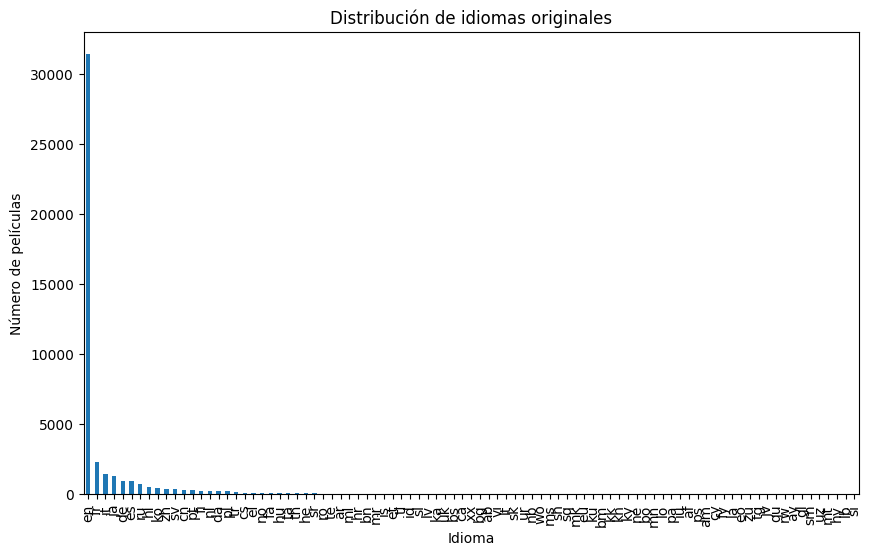

In [76]:
# Contar los valores de original_language
df_movies_filtered['original_language'].value_counts().plot(kind='bar', figsize=(10,6))
plt.title('Distribución de idiomas originales')
plt.xlabel('Idioma')
plt.ylabel('Número de películas')
plt.show()

Como resultado del análisis de esta distribución, se eliminará la columna

In [78]:
df_movies_filtered = df_movies_filtered.drop(columns='original_language')

### Distribución de duración de las películas
Visualizar cómo se distribuyen las películas en su duración

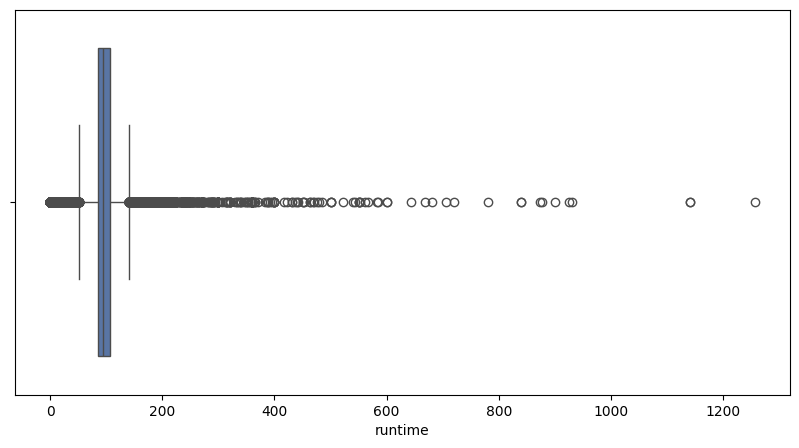

In [56]:
# Boxplot para ver la distribución según la duración de las películas
plt.figure(figsize=(10, 5))
sns.boxplot(data = df_movies_filtered, x = 'runtime', palette='deep')
plt.show()

Existe gran número de outliers para esta columna

In [57]:
# Filtrar las filas donde 'runtime' es mayor que 210
outliers = df_movies_filtered[df_movies_filtered['runtime'] > 210]

# Mostrar la cantidad de ocurrencias por valor único de 'runtime' o cualquier otra columna que te interese
outliers_count = outliers['runtime'].count()
print(outliers_count)

282


Eliminar todas las películas con una duración mayor a 3 horas y 30 minutos

In [58]:
df_movies_filtered = df_movies_filtered[df_movies_filtered['runtime'] < 210]

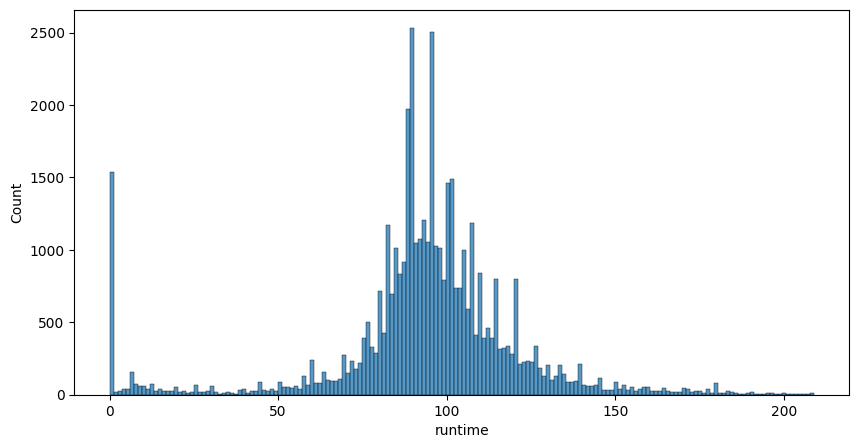

In [59]:
# Histograma para ver la distribución según la duración de las películas
plt.figure(figsize=(10, 5))
sns.histplot(data = df_movies_filtered, x = 'runtime', palette='deep')
plt.show()

### Distribución de presupuesto de las películas
Visualizar cómo se distribuyen las películas en su presupuesto

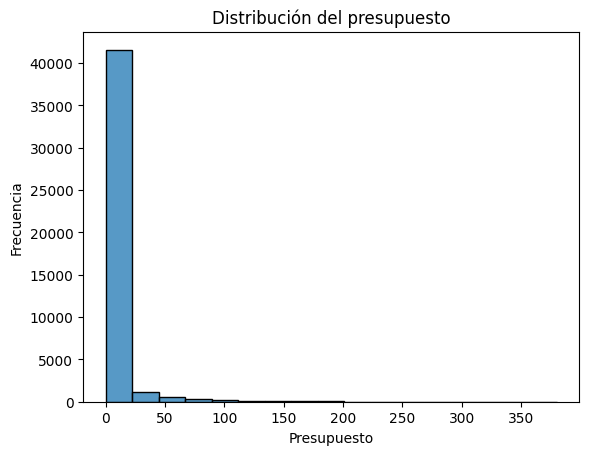

In [60]:
# Histograma del presupuesto
sns.histplot(data=df_movies_filtered, x='budget')
plt.title('Distribución del presupuesto')
plt.xlabel('Presupuesto')
plt.ylabel('Frecuencia')
plt.show()

Con esta distribución del presupuesto, se decide eliminar la columna 'budget'

In [61]:
df_movies_filtered.drop(columns='budget', inplace=True)
df_movies_filtered.head(2)

,id,title,genres,overview,runtime,production_companies,original_language,spoken_languages,revenue,production_countries,popularity,vote_average,release_year
0,862,Toy Story,"[16, 35, 10751]","Led by Woody, Andy's toys live happily in his ...",81.0,[3],en,[en],373.554033,[US],21.946943,7.7,1995
1,8844,Jumanji,"[12, 14, 10751]",When siblings Judy and Peter discover an encha...,104.0,"[559, 2550, 10201]",en,"[en, fr]",262.797249,[US],17.015539,6.9,1995


### Distribución de ganacias de las películas
Visualizar cómo se distribuyen las películas según sus ganancias

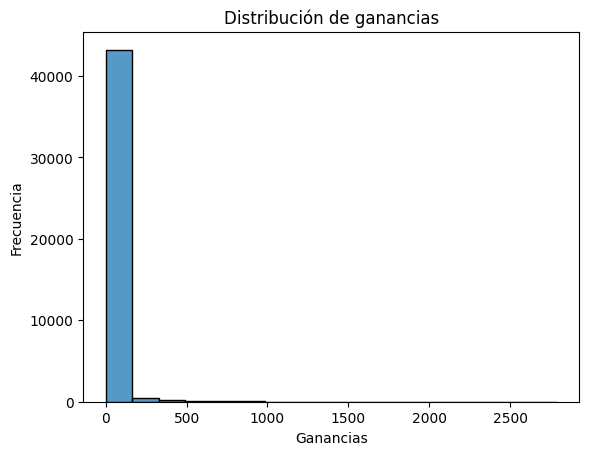

In [62]:
# Histograma de las ganancias
sns.histplot(data=df_movies_filtered, x='revenue')
plt.title('Distribución de ganancias')
plt.xlabel('Ganancias')
plt.ylabel('Frecuencia')
plt.show()

Con esta distribución del presupuesto, se decide eliminar la columna 'revenue'

In [63]:
df_movies_filtered.drop(columns='revenue', inplace=True)
df_movies_filtered.head(2)

,id,title,genres,overview,runtime,production_companies,original_language,spoken_languages,production_countries,popularity,vote_average,release_year
0,862,Toy Story,"[16, 35, 10751]","Led by Woody, Andy's toys live happily in his ...",81.0,[3],en,[en],[US],21.946943,7.7,1995
1,8844,Jumanji,"[12, 14, 10751]",When siblings Judy and Peter discover an encha...,104.0,"[559, 2550, 10201]",en,"[en, fr]",[US],17.015539,6.9,1995


### Distribución de popularidad de las películas
Visualizar cómo se distribuyen las películas según su popularidad

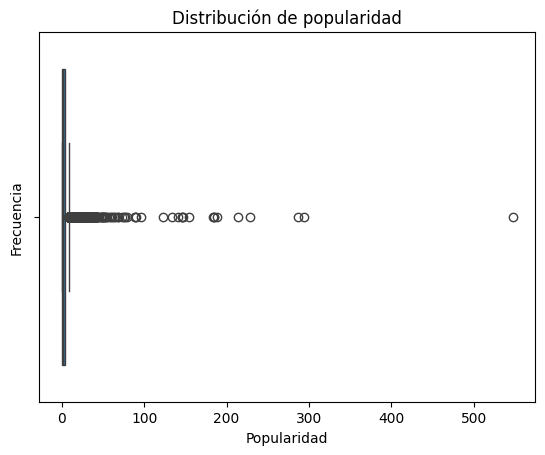

In [64]:
# Boxplot de las películas según su popularidad
sns.boxplot(data=df_movies_filtered, x='popularity')
plt.title('Distribución de popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.show()

### Distribución de puntaje promedio de las películas
Visualizar cómo se distribuyen las películas según su puntaje promedio

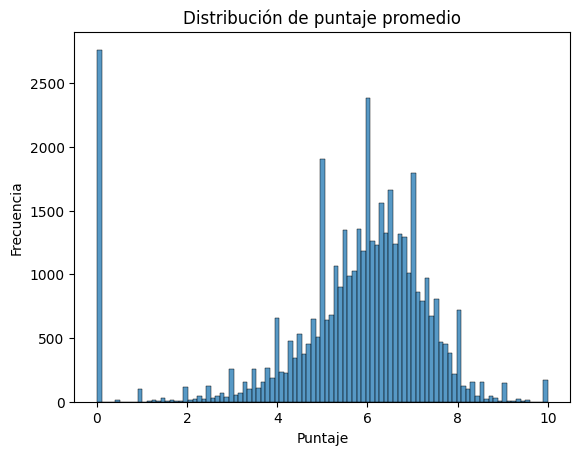

In [65]:
# Histograma de puntaje promedio
sns.histplot(data=df_movies_filtered, x='vote_average')
plt.title('Distribución de puntaje promedio')
plt.xlabel('Puntaje')
plt.ylabel('Frecuencia')
plt.show()

### Relación Película - Popularidad
Se quiere analizar cuales compañías películas tienen mayor popularidad dentro del dataset

In [66]:
df_final = (
    df_movies_filtered[['title', 'popularity']]
    .sort_values(by='popularity', ascending=False)
    .reset_index(drop=True)
)

df_final.head(10)

,title,popularity
0,Minions,547.488298
1,Wonder Woman,294.337037
2,Beauty and the Beast,287.253654
3,Baby Driver,228.032744
4,Big Hero 6,213.849907
5,Deadpool,187.860492
6,Guardians of the Galaxy Vol. 2,185.330992
7,Avatar,185.070892
8,John Wick,183.870374
9,Gone Girl,154.801009


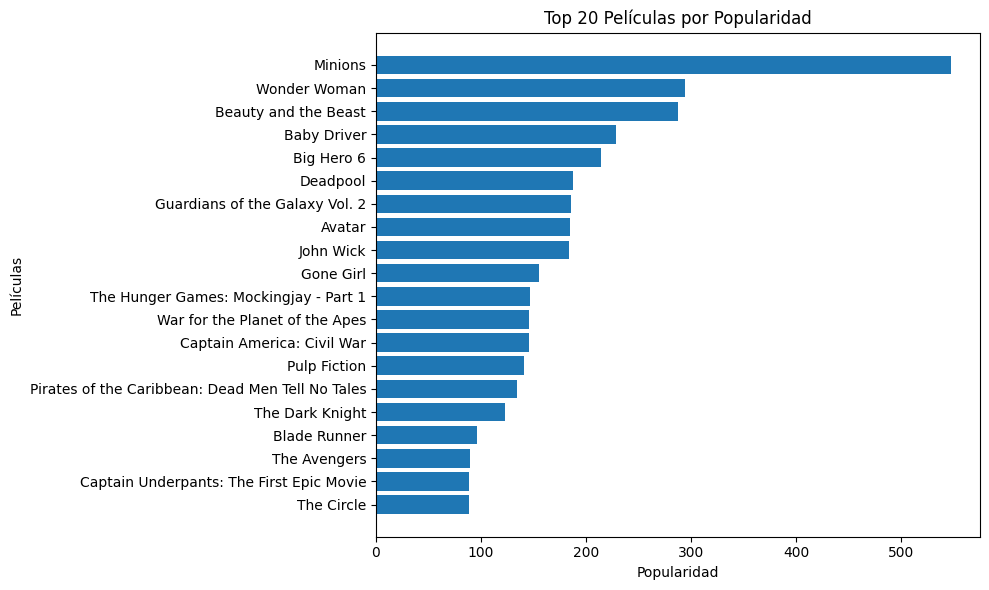

In [67]:
# Seleccionar las primeras 20 películas según popularidad
top_20_pelis = df_final.head(20)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_20_pelis['title'], top_20_pelis['popularity'])
plt.xlabel('Popularidad')
plt.ylabel('Películas')
plt.title('Top 20 Películas por Popularidad')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Relación Género - Popularidad
Se quiere analizar cuales géneros tienen mayor popularidad dentro del dataset

In [86]:
df_final = (
    df_movies_filtered[['genres', 'popularity']]
    .explode('genres')  # Descomponer la columna de listas
    .groupby('genres', as_index=False)['popularity'].sum()  # Agrupar por el id de género y sumar popularidades
    .merge(df_genres[['id', 'name']], left_on='genres', right_on='id')  # Hacer el merge con géneros
    [['name', 'popularity']]  # Seleccionar las columnas finales
    .sort_values(by='popularity', ascending=False)  # Ordenar por popularidad de forma descendente
    .reset_index(drop=True)  # Restablecer el índice
)

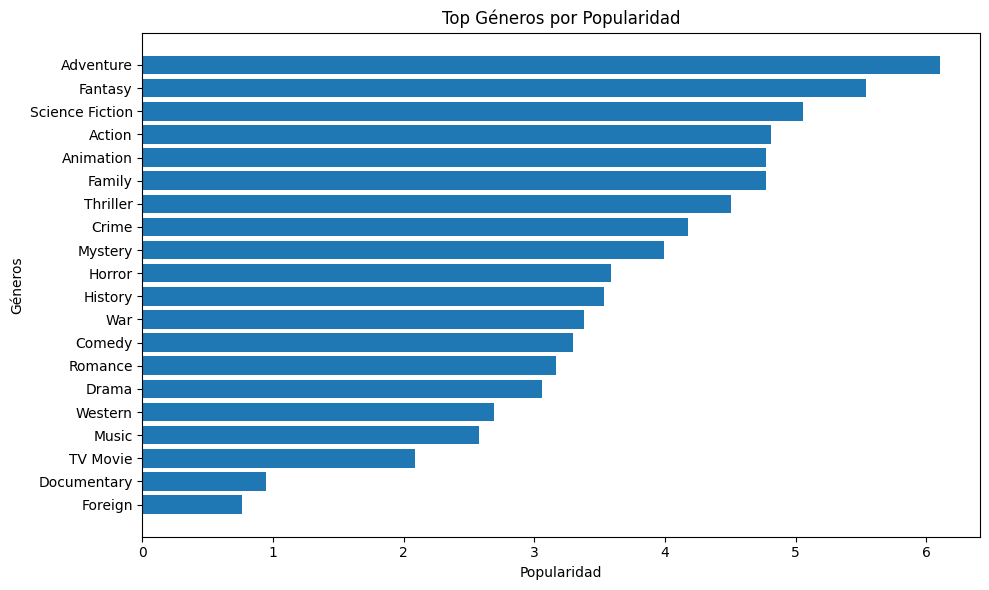

In [87]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(df_final['name'], df_final['popularity'])
plt.xlabel('Popularidad')
plt.ylabel('Géneros')
plt.title('Top Géneros por Popularidad')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Relación Productora - Popularidad
Se quiere analizar cuales compañías productoras tienen mayor popularidad dentro del dataset

In [70]:
df_final = (
    df_movies_filtered[['production_companies', 'popularity']]
    .explode('production_companies')  # Descomponer la columna de listas
    .groupby('production_companies', as_index=False)['popularity'].sum()  # Agrupar por el id de productora y sumar popularidades
    .merge(df_prodcompanies[['id', 'name']], left_on='production_companies', right_on='id')  # Hacer el merge con nombres de productoras
    [['name', 'popularity']]  # Seleccionar las columnas finales
    .sort_values(by='popularity', ascending=False)  # Ordenar por popularidad de forma descendente
    .reset_index(drop=True)  # Restablecer el índice
)

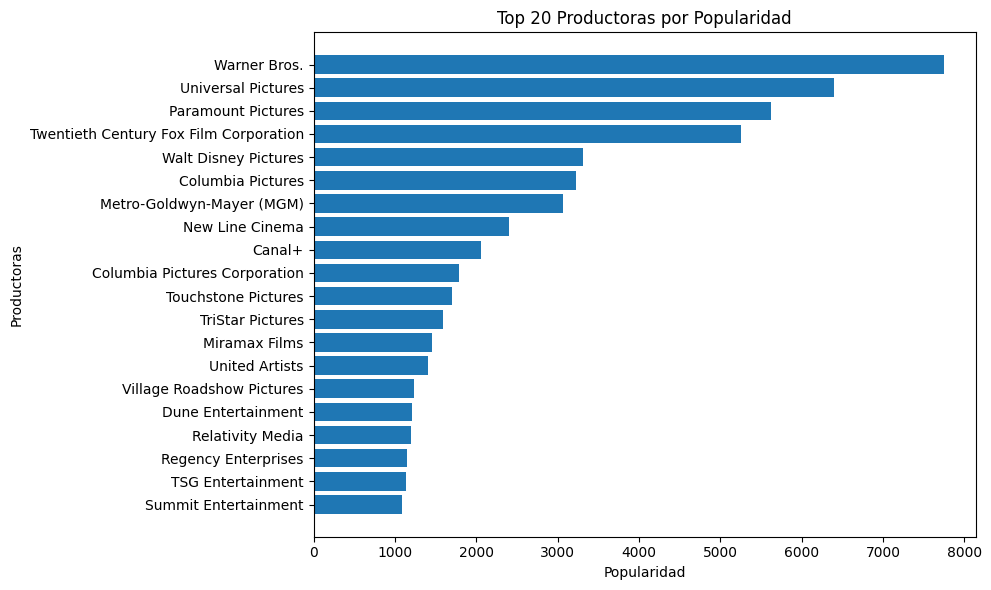

In [71]:
# Seleccionar las primeras 20 productoras según popularidad
top_20 = df_final.head(20)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_20['name'], top_20['popularity'])
plt.xlabel('Popularidad')
plt.ylabel('Productoras')
plt.title('Top 20 Productoras por Popularidad')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


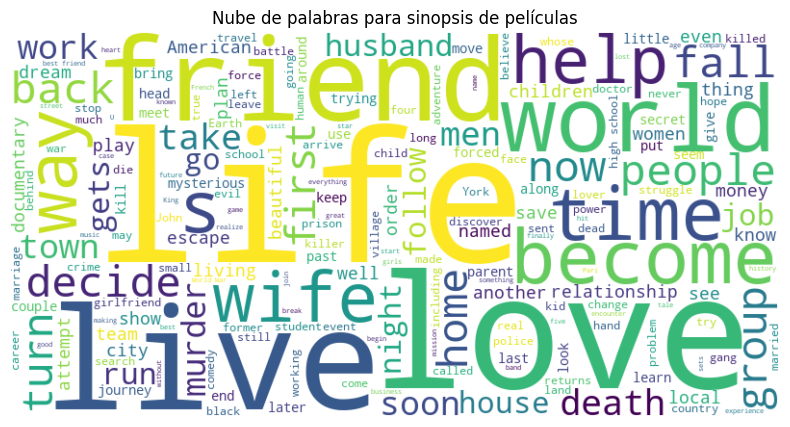

In [83]:
# Rellenar los valores nulos con una cadena vacía
df_movies_filtered['overview'] = df_movies_filtered['overview'].fillna('')

# Definir las stopwords (palabras que queremos excluir)
stopwords = set(STOPWORDS)
stopwords.update([
    "the", "a", "an", "and", "or", "but", "so", "of", "in", "on", "with", "by", "for", "from", "at", "to", "it", "its", "this", "that", "is", "are", "was", "were", 
    "be", "been", "being",
    "have", "has", "had", "i", "you", "he", "she", "we", "they", "his", "her", "their", "there", "them", "then", "when", "where", "what", "who", "which", "why", "how",
    "just", "about",
    "into", "like", "out", "over", "under", "before", "after", "as", "all", "one", "two", "three", "more", "most", "many", "few", 
    "movie", "film", "films", "story", "plot", "character", "characters", "director", "actors", "role", "scene", "scenes", "based", "villain", "sequel", "prequel", 
    "series", "set", "takes",
    "place", "stars", "produced", "produces", "production", "released", "release", "year", "years", 
    "month", "months", "day", "days", "part", "parts",
    "young", "old", "man", "woman", "boy", "girl", "family", "father", "mother", "son", "daughter", "brother", "sister", "find", 
    "discovers", "fight", "against", "away", "new", "return", "facing", "must", "will", 
    "can", "tries", "ends", "begins", "helps",
    "starts", "goes", "comes", "leads", "takes", "finds", "discovers", "faces", "tries", "leaves", "meets", "begins", "ends", "find", "fights", "wants", "needs", "helps", "works", 
    "together", "make", "makes", "tells", "asks"
])

# Unir todas las sinopsis en un solo string
text = " ".join(overview for overview in df_movies_filtered['overview'])

# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Nube de palabras para sinopsis de películas')
plt.show()